In [1]:
# Import libraries and packages
import os
import pandas as pd
import numpy as np

# Define path with .py codes containing functions used in this script
os.getcwd()
os.chdir( '../src/features')

# Import useful functions for this script  
from tracking import track
import matplotlib.pyplot as plt

# Reading data
#### Define path to data files

In [2]:
track("Defining path to data files")

# Define base path to data files
path1 = '../../data/raw/'
path2 = '../../temp_data/'

# Define path to the jira issues table
# path_git_commits = path1 + 'GIT_COMMITS.csv'
# path_jira_issues = path1 + 'JIRA_ISSUES.csv'
path_clusters_data = path2 + 'model_data_with_clusters.csv'

# Ensure the input file exist
# assert os.path.isfile(path_git_commits), f'{path_git_commits} not found. Is it a file?'
# assert os.path.isfile(path_jira_issues), f'{path_jira_issues} not found. Is it a file?'
assert os.path.isfile(path_clusters_data), f'{path_clusters_data} not found. Is it a file?'

#### Read the files

In [3]:
track("Reading files")

# Read GIT_COMMITS, JIRA_ISSUES, and clusterized data 
clusterized_data = pd.read_csv(path_clusters_data)

track("Finished reading files")

# Validation

In [4]:
average_quality = (clusterized_data.groupby('clusters').agg(blocker_violations_mean = ('blocker_violations', 'mean'),
                                          blocker_violations_std = ('blocker_violations', 'std'),
                                          critical_violations_mean = ('critical_violations', 'mean'),
                                          critical_violations_std = ('critical_violations', 'std'),
                                          major_violations_mean = ('major_violations', 'mean'),
                                          major_violations_std = ('major_violations', 'std'),
                                          minor_violations_mean = ('minor_violations', 'mean'),
                                          minor_violations_std = ('minor_violations', 'std'),
                                          code_smells_mean = ('code_smells', 'mean'),
                                          code_smells_std = ('code_smells', 'std'),
                                          bugs_mean = ('bugs', 'mean'),
                                          bugs_std = ('bugs', 'std'),
                                          vulnerabilities_mean = ('vulnerabilities', 'mean'),
                                          vulnerabilities_std = ('vulnerabilities', 'std'),
                                          sqale_debt_ratio_mean = ('sqale_debt_ratio', 'mean'),
                                          sqale_debt_ratio_std = ('sqale_debt_ratio', 'std'),
                                          blocker_mean = ('blocker', 'mean'),
                                          blocker_std = ('blocker', 'std'),
                                          critical_mean = ('critical', 'mean'),
                                          critical_std = ('critical', 'std'),
                                          major_mean = ('major', 'mean'),
                                          major_std = ('major', 'std'),
                                          minor_mean = ('minor', 'mean'),
                                          minor_std = ('minor', 'std'))).reset_index()

In [5]:
FONTSIZE = 30
FIG_WIDTH = 38
FIG_HEIGHT = 15

In [6]:
def plot_quality_metrics(df,metrics):
    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
    for metric in metrics:
        markers, caps, bars = plt.errorbar(range(len(df)), df[metric + '_mean'], df[metric + '_std'],
                                        label=metric,  fmt='--o', markersize=15, elinewidth=6)
        [bar.set_alpha(0.4) for bar in bars]
        [cap.set_alpha(0.4) for cap in caps]

    plt.title('Quality of each cluster', fontsize = FONTSIZE)
    plt.xlabel('Cluster', fontsize = FONTSIZE)
    plt.ylabel('Metric value', fontsize = FONTSIZE)
    plt.xticks(ticks=range(len(df)), labels=df["clusters"], fontsize = FONTSIZE)
    #plt.yticks(ticks = [-.4,-.2, 0,.2, .4, .6, .8,1.], fontsize=FONTSIZE)
    plt.legend(metrics, bbox_to_anchor=(1.001,0.8), prop={'size': FONTSIZE})
    plt.grid()
    #plt.savefig('./output/Height/r2_height',  bbox_inches='tight')
    plt.show()
    plt.close()

In [7]:
violation_metrics = ["blocker_violations", "critical_violations", "major_violations", "minor_violations"]
severity_metrics = ["blocker", "critical", "major", "minor"]
other_metrics = ["code_smells", "bugs", "vulnerabilities", "sqale_debt_ratio"]

In [8]:
def order_table(df,metrics):
    ordered = df.copy()
    # Creation of a new column that will contain the sum of the metrics.
    sum_metrics = [0 for i in range(len(df))] # Equal to num clusters.
    for i, row in  ordered.iterrows():
        for metric in metrics:
            sum_metrics[i]+= row[metric+"_mean"]
    ordered["sum_metrics"] = sum_metrics
    return ordered.sort_values(by=['sum_metrics'],ascending = False)

In [9]:
ordered = order_table(average_quality,violation_metrics)

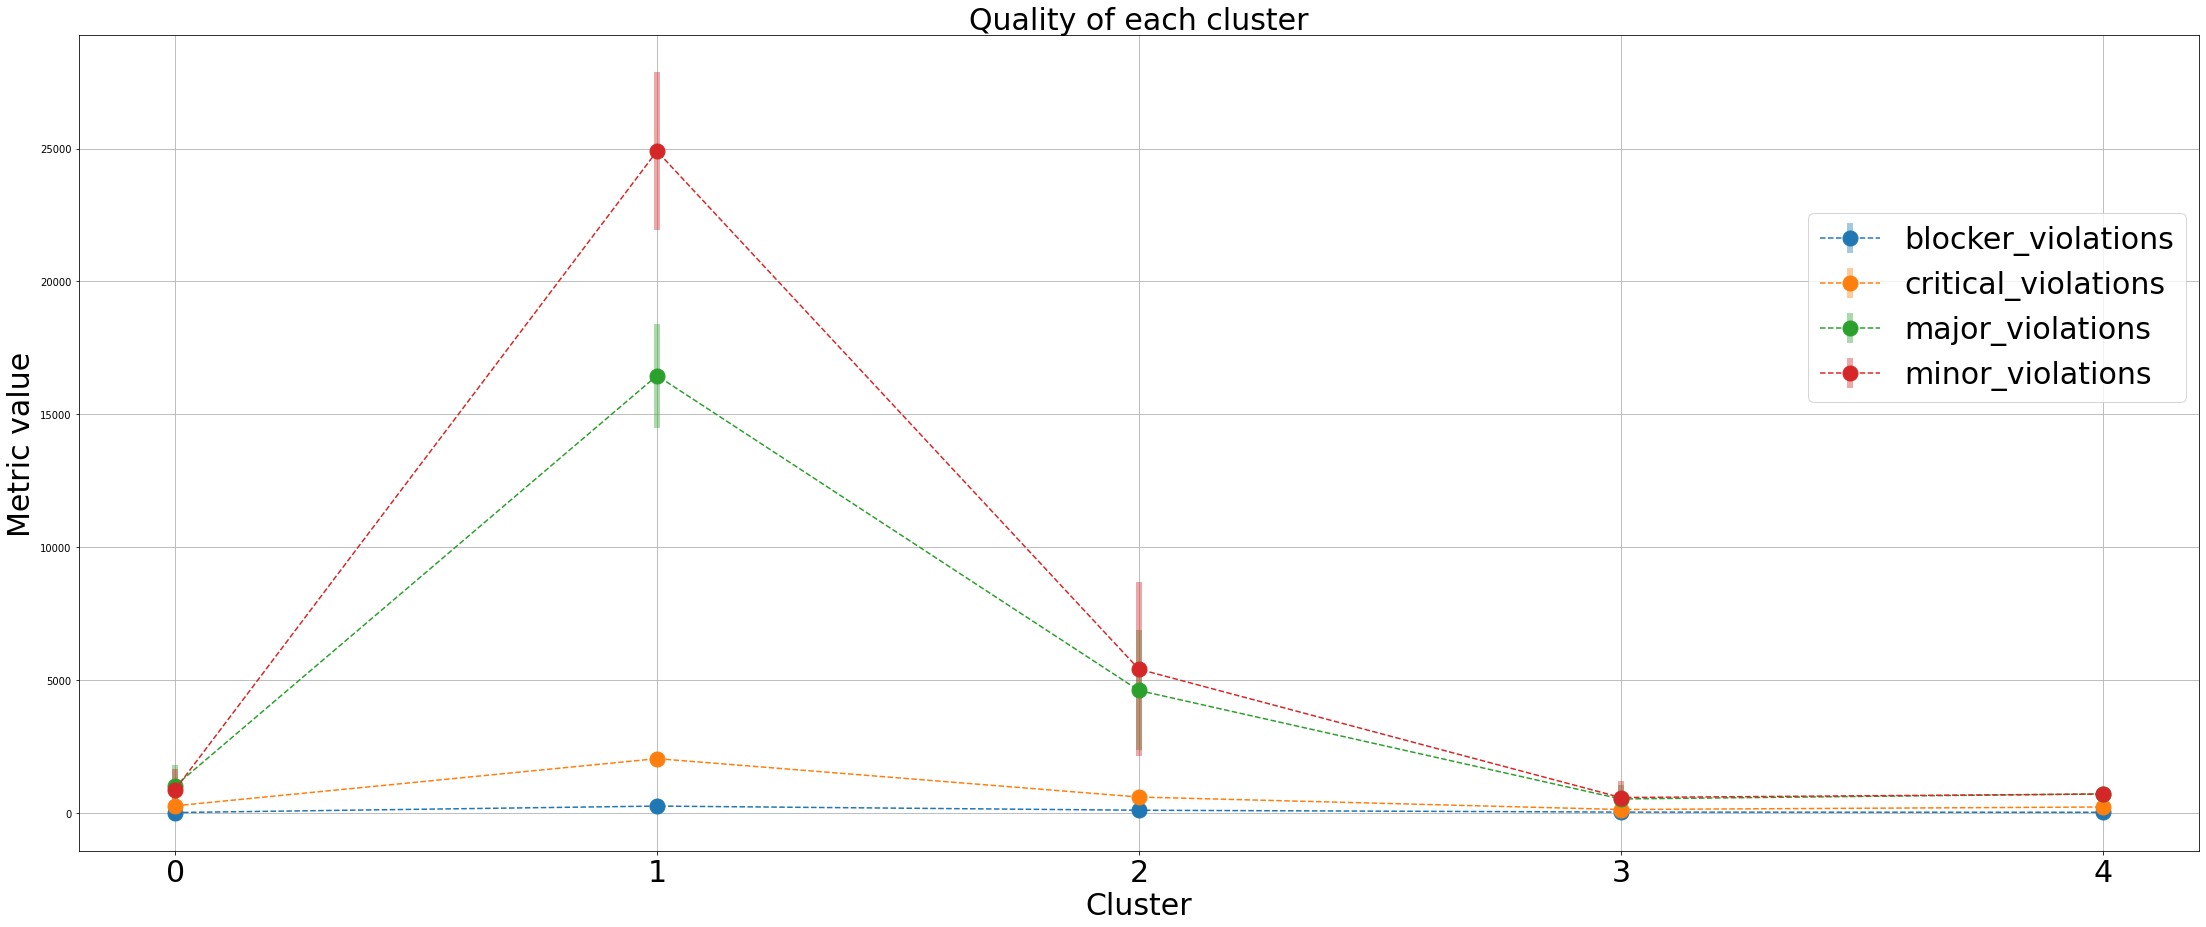

In [10]:
plot_quality_metrics(average_quality,violation_metrics)

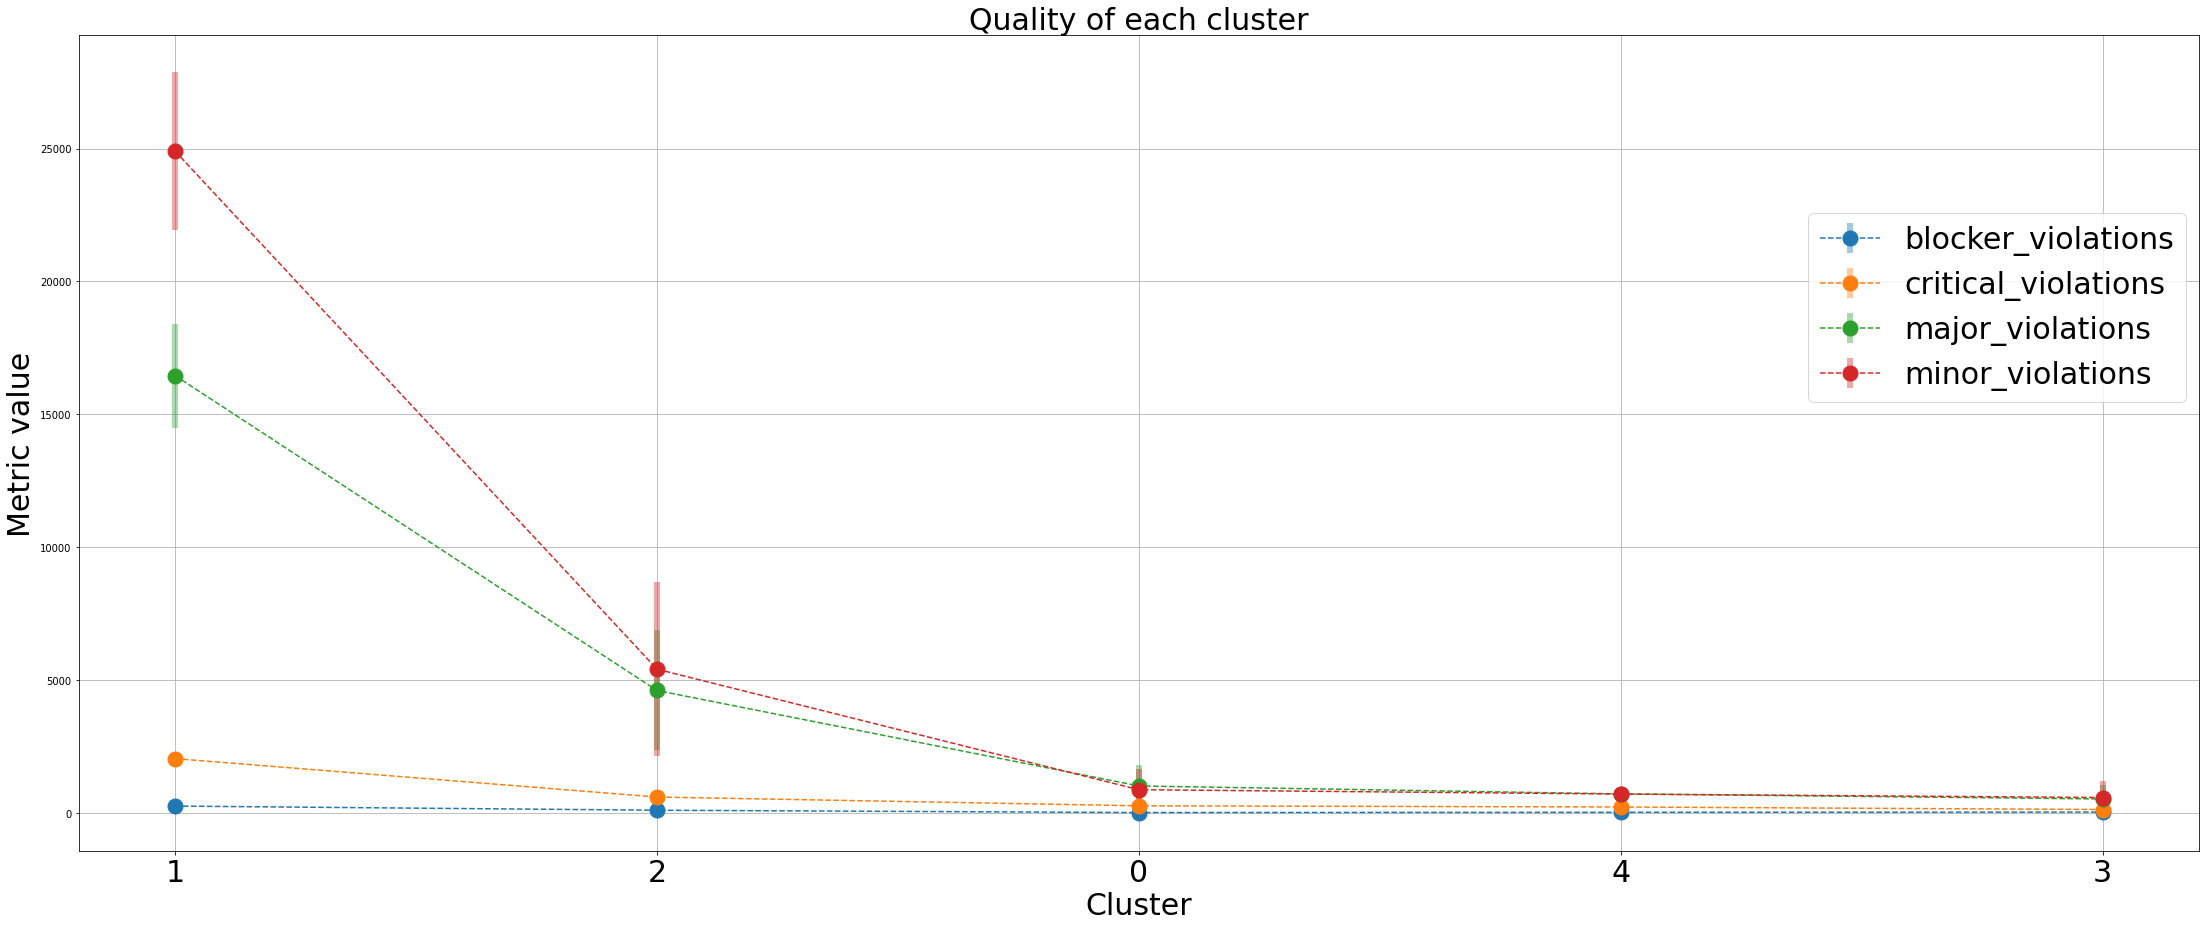

In [11]:
plot_quality_metrics(ordered,violation_metrics)

In [12]:
ordered2 = order_table(average_quality,severity_metrics)

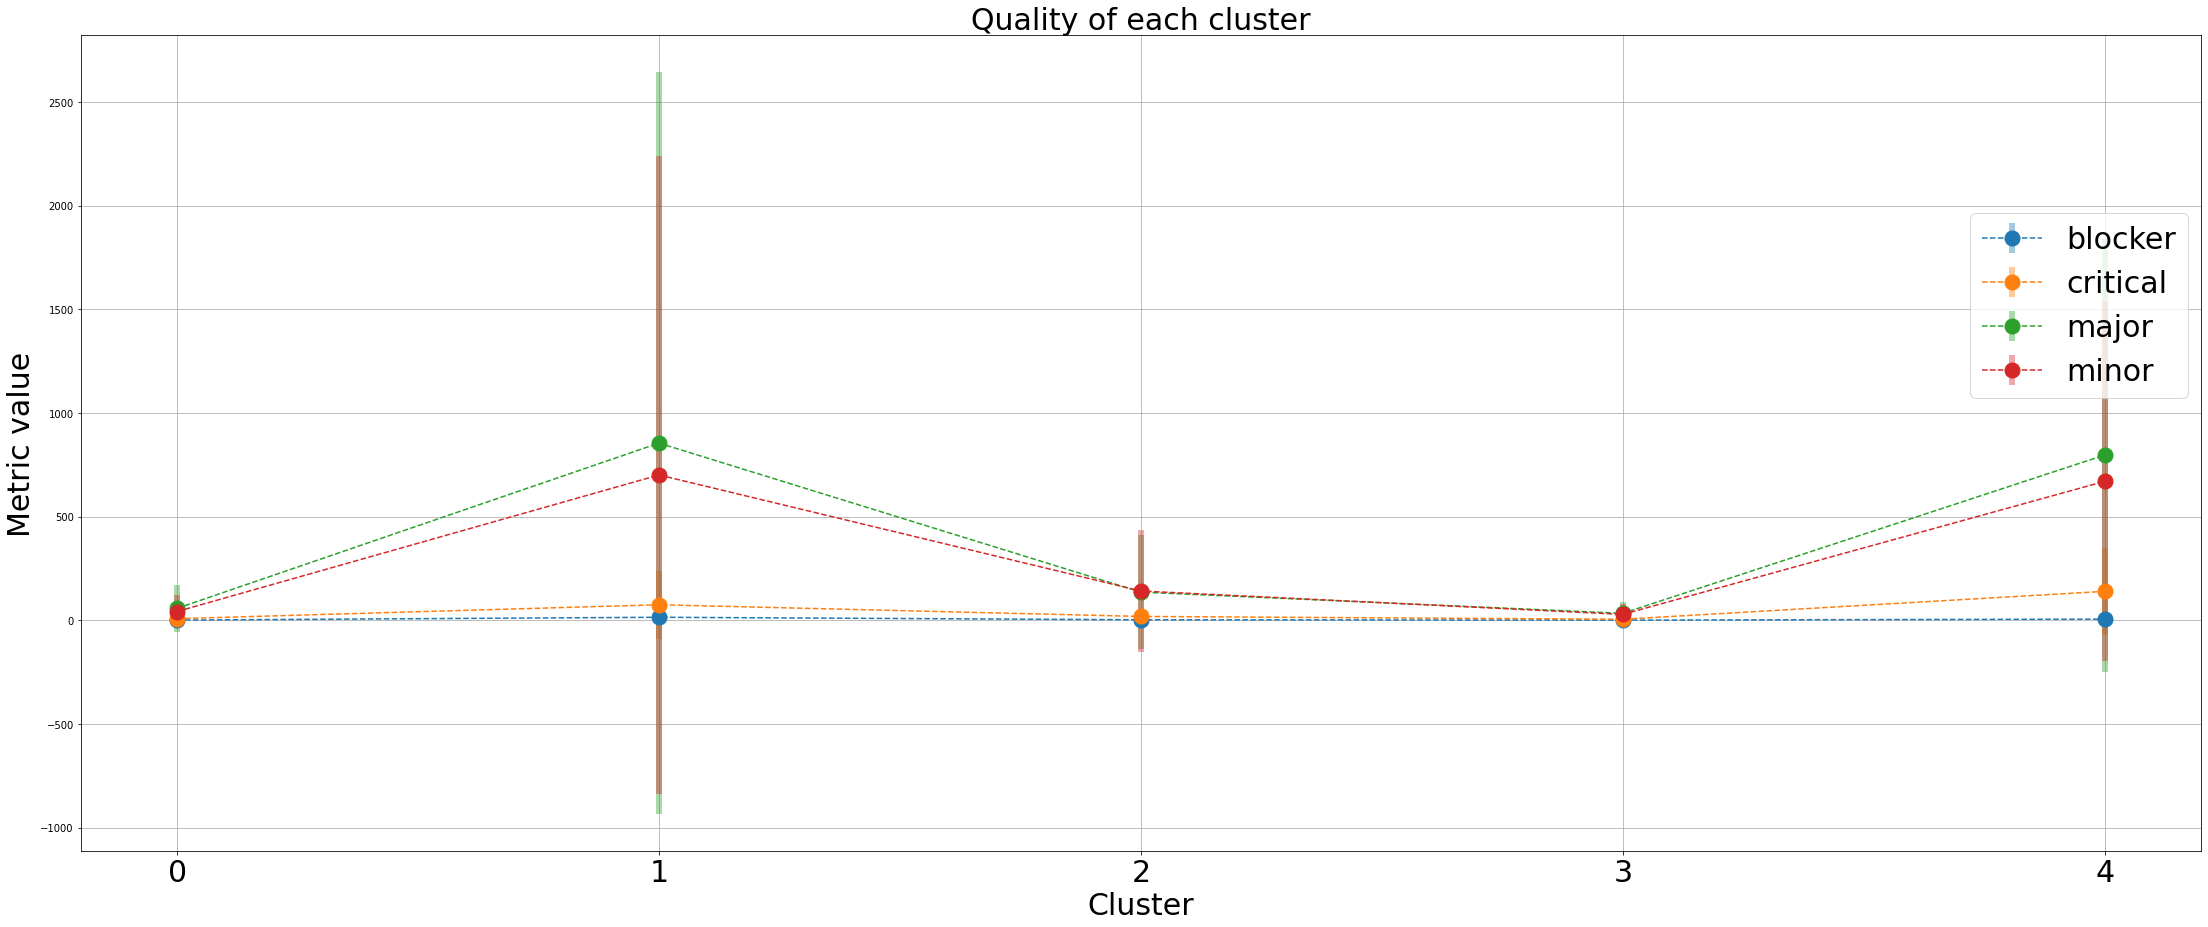

In [13]:
plot_quality_metrics(average_quality,severity_metrics)

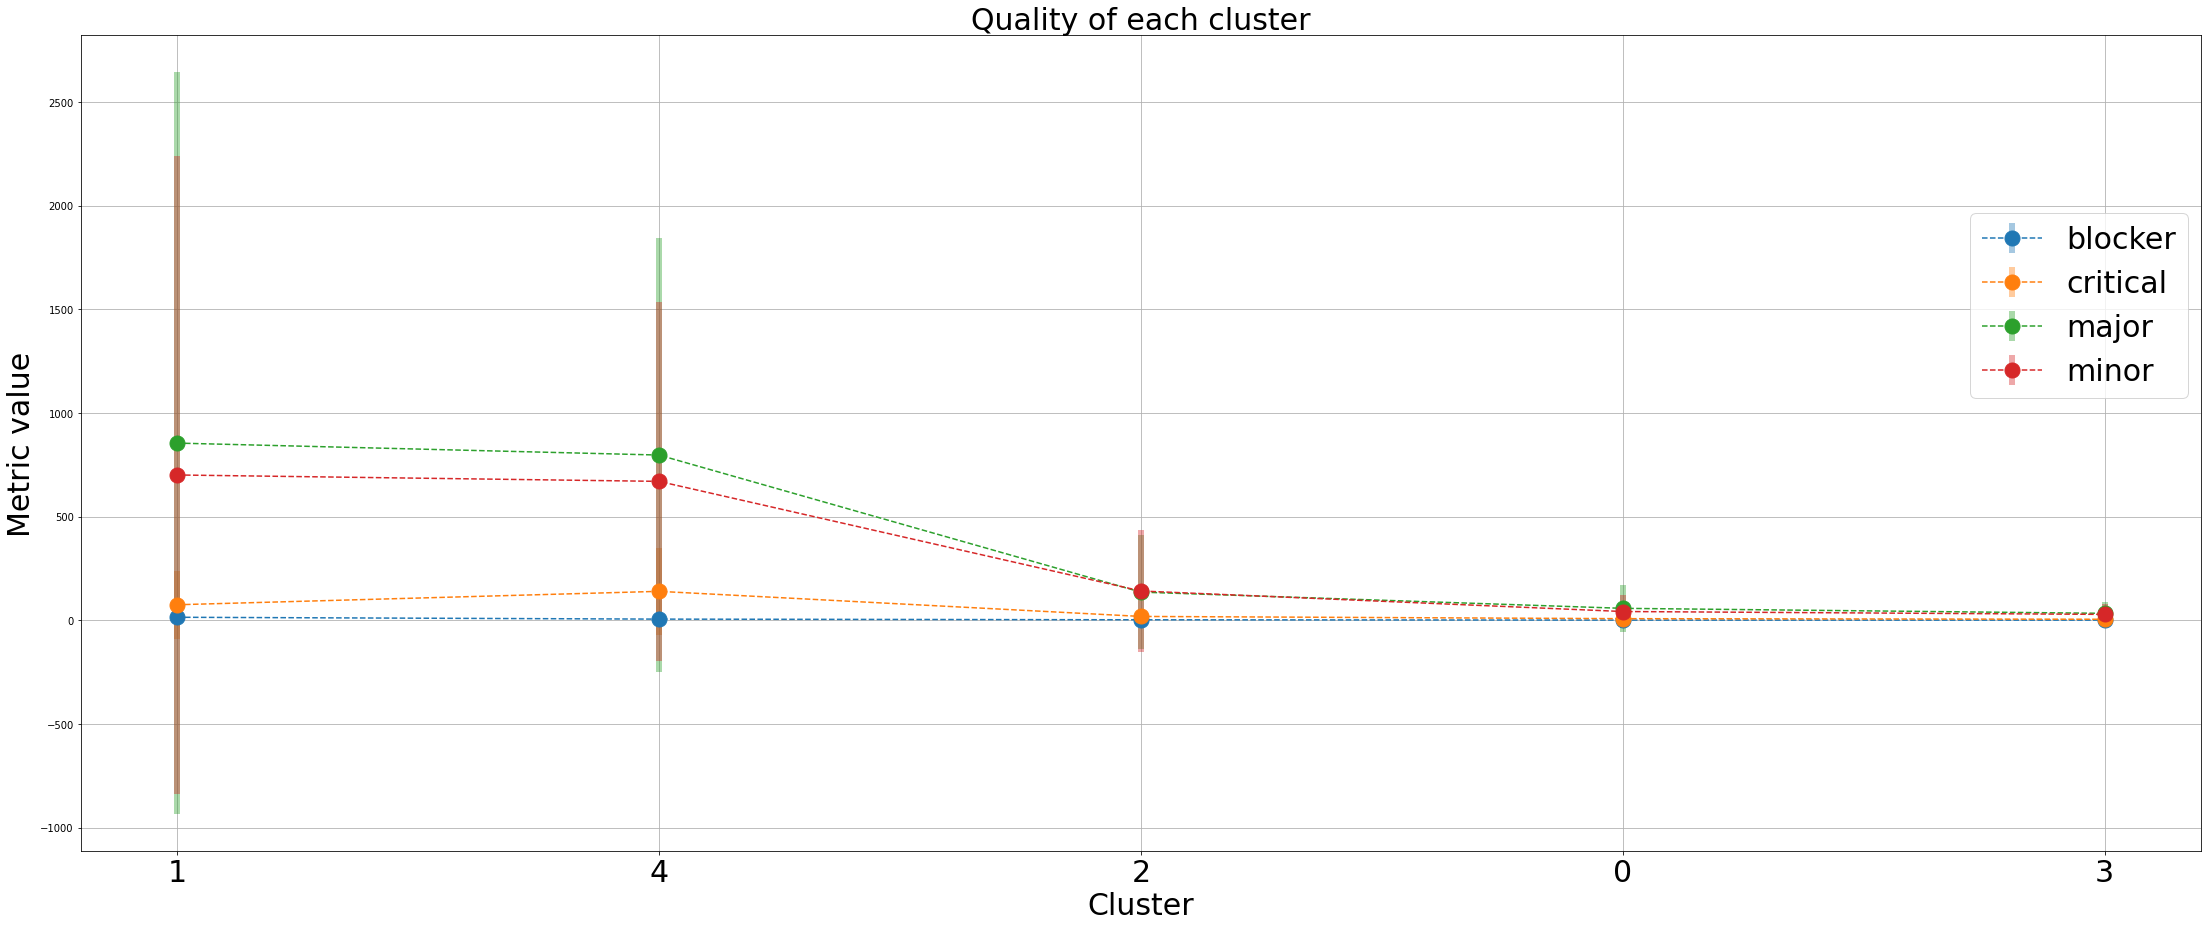

In [14]:
plot_quality_metrics(ordered2,severity_metrics)

In [15]:
ordered3 = order_table(average_quality,other_metrics)

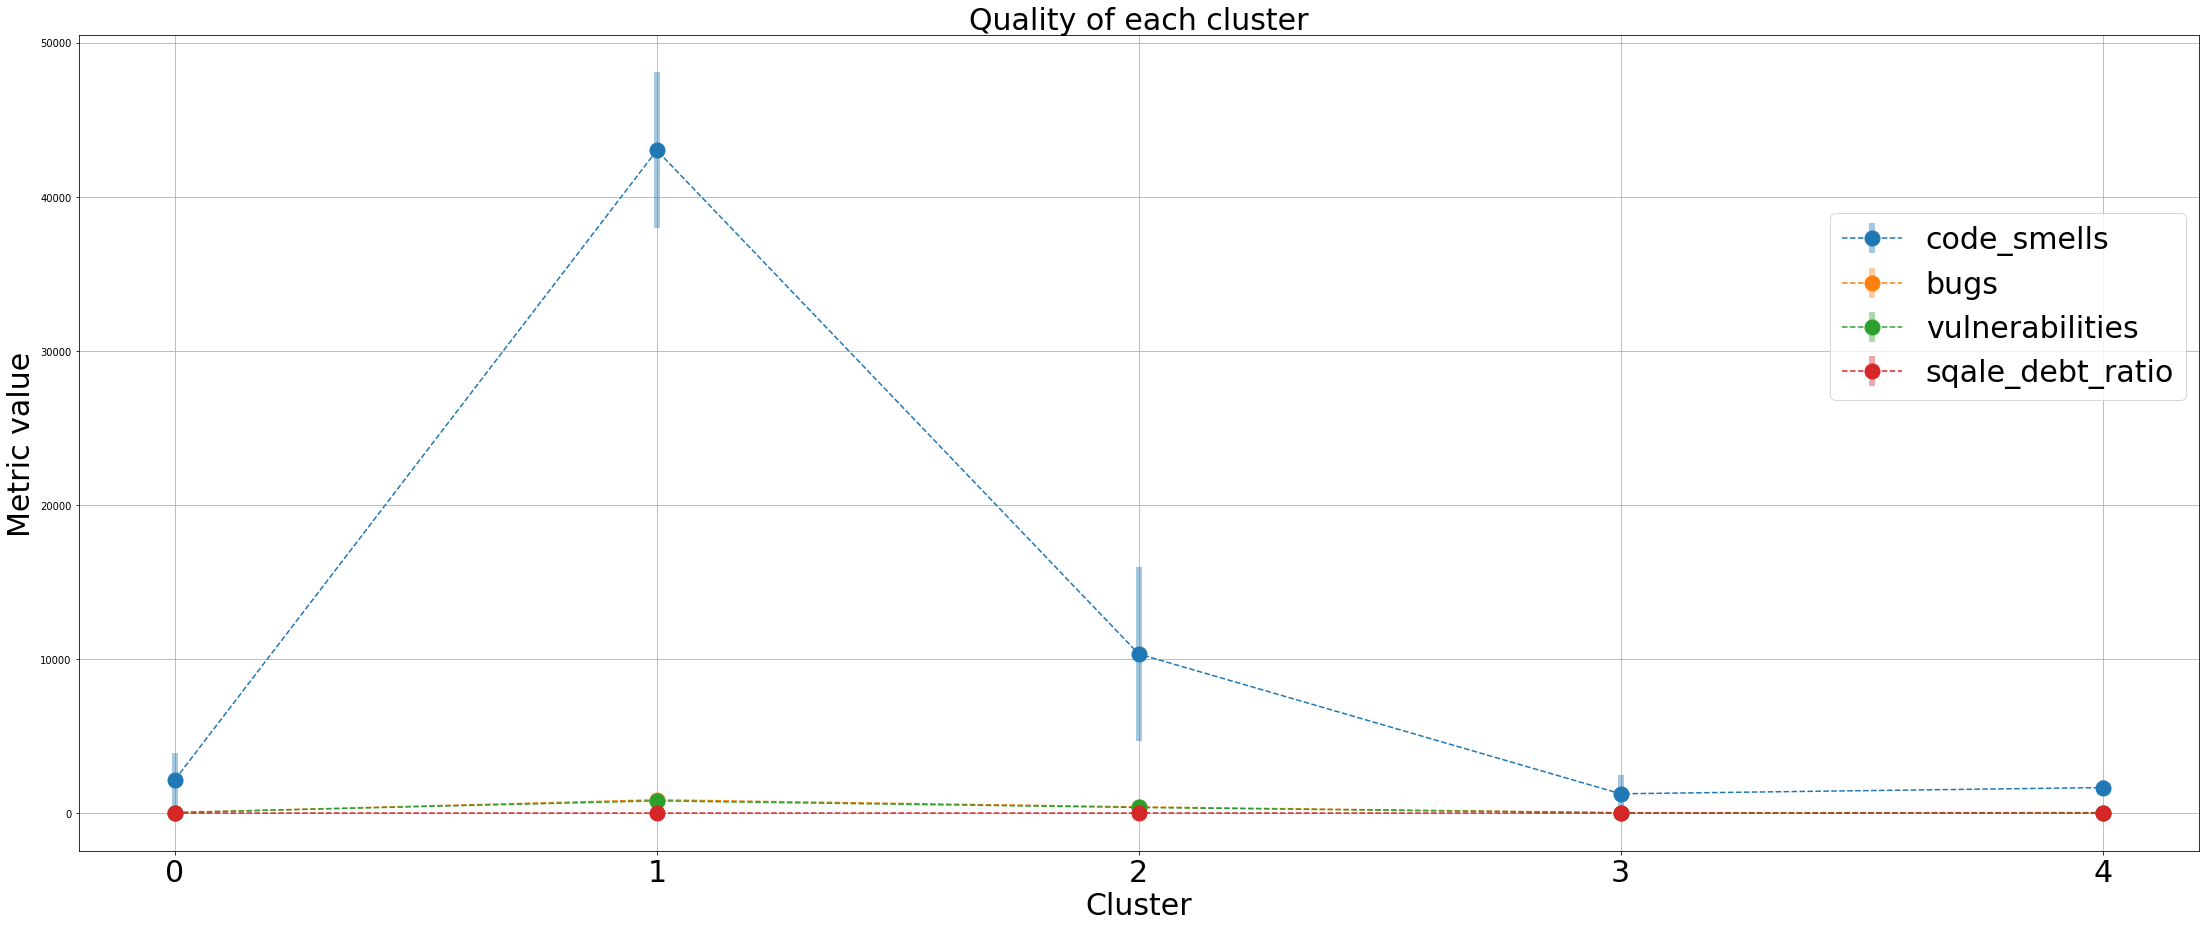

In [16]:
plot_quality_metrics(average_quality,other_metrics)

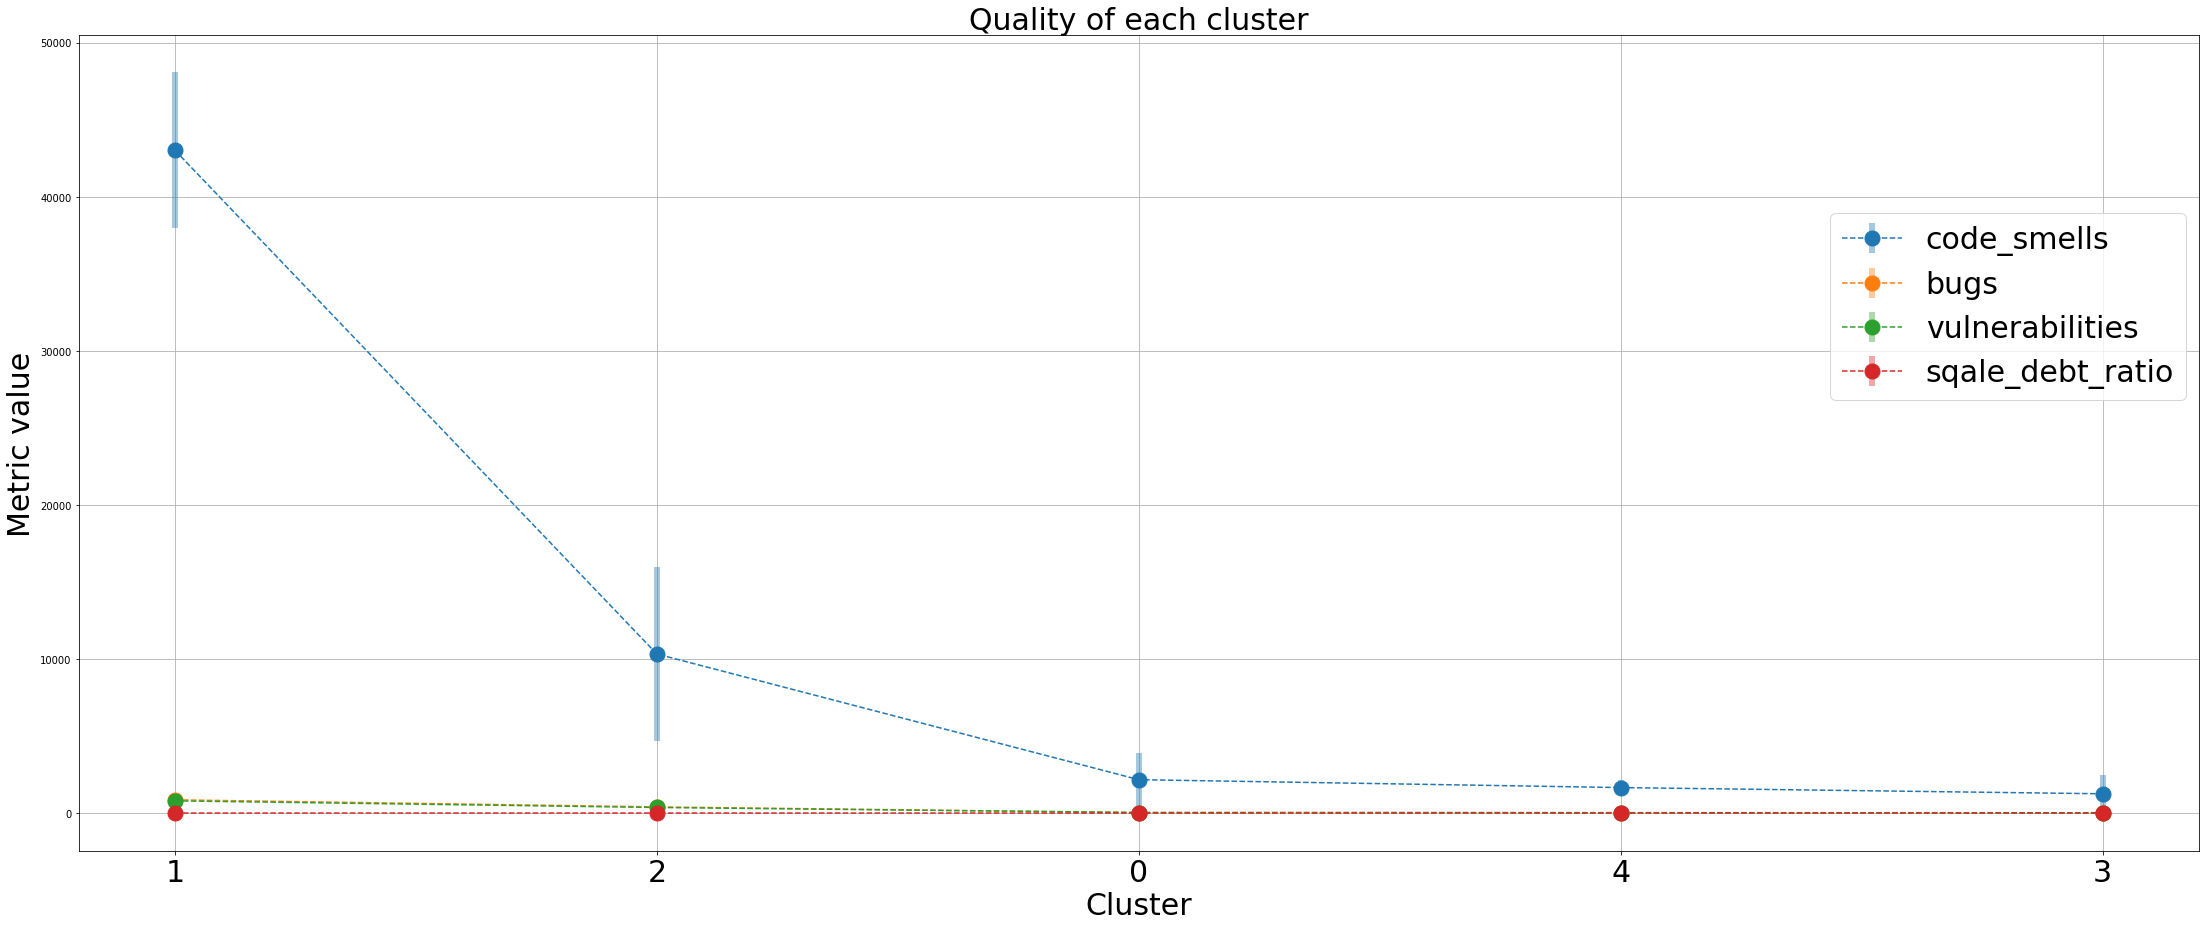

In [17]:
plot_quality_metrics(ordered3,other_metrics)

# Creation of quality index.

In [18]:
# Hay que mirar si normalizamos y como invertir las que cuanto mas bajo mejor.